

# Question 5


Create a similar function for Recovery Curves -- which shows the cumulative recovery as a % of exposure at default. 

This should only include loans that have defaulted and have an index of `months since default'.

In [26]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from portfolio_model import Loans_Portfolio

In [26]:
mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'


pd.options.mode.copy_on_write = True 
pd.options.display.float_format = "{:,.2f}".format

In [27]:
cob = datetime.date(2022, 12, 31) # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'

In [28]:
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [29]:
portfolio.create_enriched_data_portfolio()
df = portfolio.enriched_data

In [30]:
df.head()

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
0,1,2020-12-31,"150,876.00",NaN,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-24,False,0.00,2021-08-31,NaT,NaN,NaN
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-23,True,0.00,2021-08-31,NaT,NaN,NaN
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-22,True,0.00,2021-08-31,NaT,NaN,NaN
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-21,True,0.00,2021-08-31,NaT,NaN,NaN
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-20,True,0.00,2021-08-31,NaT,NaN,NaN


Filter the data to satisfy the following condition.
"This should only include loans that have defaulted." 

In [31]:
filtered = df[~pd.isnull(df.date_of_default)]

Add the attribute `months_since_default` this is the integer number of months since default to current date.

In [32]:
filtered['months_since_default'] = filtered['level_1'].dt.to_period('M').astype(int) - filtered['date_of_default'].dt.to_period('M').astype(
            int)
filtered

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent,months_since_default
55,3,2018-02-28,"89,311.00",NaN,0.00,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,False,-24,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-50
56,3,2018-03-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,False,-23,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-49
57,3,2018-04-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,False,-22,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-48
58,3,2018-05-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,False,-21,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-47
59,3,2018-06-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,False,-20,False,"88,870.54",2022-07-31,2022-04-30,"77,342.56",1.15,-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.00,False,-15,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,-1
41748,1606,2022-09-30,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.00,False,-14,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,0
41749,1606,2022-10-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.00,False,-13,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,1
41750,1606,2022-11-30,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.00,False,-12,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61,2


In [33]:
filtered['date_of_default']

55      2022-04-30
56      2022-04-30
57      2022-04-30
58      2022-04-30
59      2022-04-30
           ...    
41747   2022-09-30
41748   2022-09-30
41749   2022-09-30
41750   2022-09-30
41751   2022-09-30
Name: date_of_default, Length: 2463, dtype: datetime64[ns]

In [34]:
filtered['year_of_default'] = filtered['date_of_default'].dt.year

Note that we have only those loans which have defaultd.

In [35]:
filtered.loan_id.unique()

array([   3,   38,   52,   89,   92,   93,  154,  178,  199,  208,  212,
        222,  227,  292,  299,  313,  338,  361,  372,  429,  445,  469,
        478,  512,  516,  577,  614,  641,  648,  666,  681,  685,  692,
        696,  702,  704,  706,  748,  835,  844,  846,  855,  864,  903,
        946,  974,  996, 1085, 1119, 1120, 1177, 1188, 1212, 1215, 1239,
       1331, 1372, 1386, 1397, 1430, 1433, 1560, 1567, 1606])

In [36]:
filtered.months_since_default.unique()

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23, -51, -54, -53, -52,
       -60, -59, -58, -57, -56, -55, -62, -61, -68, -67, -66, -65, -64,
       -63])

In [37]:
filtered.year_of_default.unique()

array([2022, 2021], dtype=int32)

In [38]:
filtered[filtered.months_since_default == 4][['loan_id', 'months_since_default','recovery_in_month', 'recovery_cumsum', 'exposure_at_default', 'year_of_default']].head()

,loan_id,months_since_default,recovery_in_month,recovery_cumsum,exposure_at_default,year_of_default
109,3,4,0.00,"88,870.54","77,342.56",2022
1155,38,4,0.00,0.00,"49,886.97",2022
1442,52,4,0.00,0.00,"195,384.53",2022
2294,92,4,0.00,0.00,"189,065.38",2022
3831,154,4,0.00,0.00,"107,899.28",2021


In [39]:
n_months_from_default = filtered.months_since_default.unique()
recovery_curve = []
for n in n_months_from_default:

    subdata = filtered[filtered.months_since_default == n]
    recovery_pct = sum(subdata.recovery_cumsum)/sum(subdata.exposure_at_default)
    recovery_curve.append(recovery_pct)

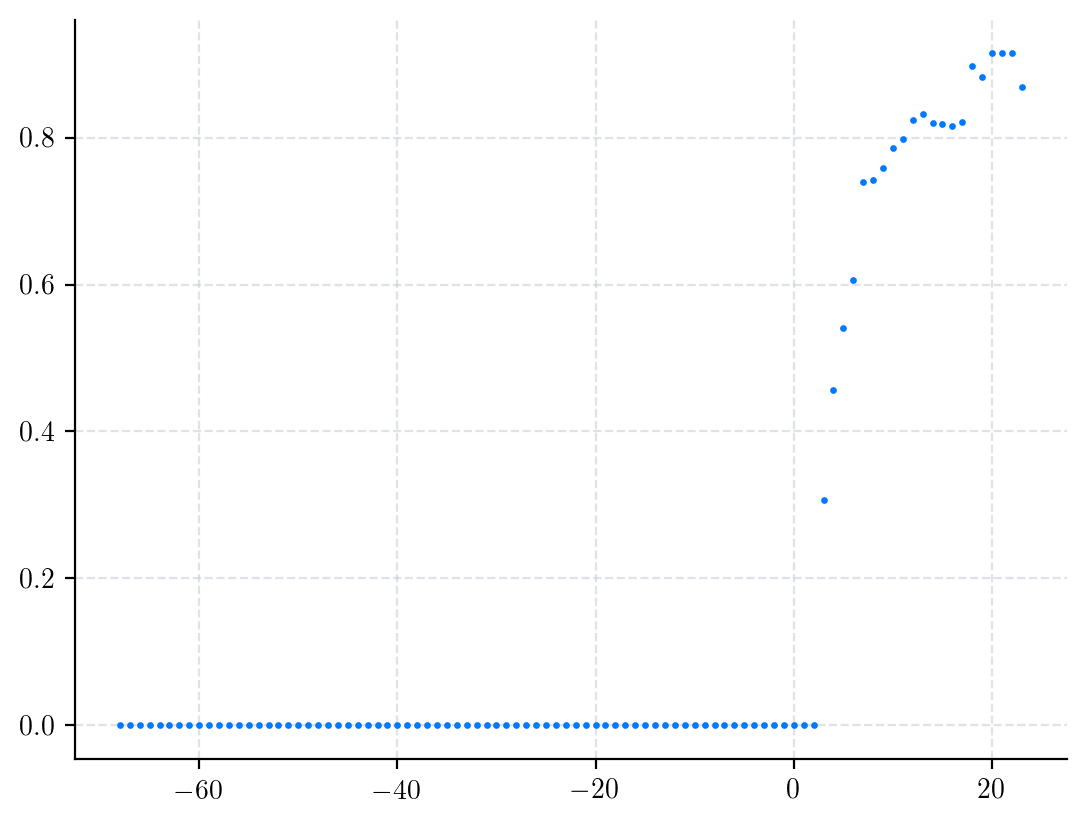

In [40]:
plt.scatter(n_months_from_default, recovery_curve, s =2)
plt.show()